In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("combined_new_dataset.csv")

In [4]:
df["AlarmMessage"].value_counts()

The value of 'redact' alert had occurred; but has returned to normal.                                         3162425
The value of 'redact' was too low; but has now returned to normal.                                            2227230
The value of 'redact' was too high; but has now returned to normal.                                           1741702
The battery is not installed properly.                                                                        1586294
The battery is now installed.                                                                                 1310530
                                                                                                               ...   
SP: Long-term increasing temperature rate of change violation cleared for RR.01.103.03.T.R at RR.01.103.03          1
Rack PDU 1: High temperature threshold violation cleared for Temp Sensor                                            1
THM: Long-term decreasing temperature rate of change vio

In [3]:
len(df)

34822187

There are total 4340656 rows including the missing values

In [4]:
#Exploring the different columns 
df.columns

Index(['AssetId', 'organizationid', 'organizationcountrycode', 'locationid',
       'AssetType', 'AlarmLabel', 'AlarmMessage', 'Severity',
       'ActivatedTimestamp', 'ClearedTimestamp', 'month', 'week'],
      dtype='object')

In [5]:
#exploring the first five rows of the dataset
df.head(5)

,AssetId,organizationid,organizationcountrycode,locationid,AssetType,AlarmLabel,AlarmMessage,Severity,ActivatedTimestamp,ClearedTimestamp,month,week
0,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,NaN,UPS,Battery Near End Of Life Cleared,The battery is no longer near the end of life.,WARNING,2021-01-17T23:32:55Z,2021-03-16T14:37:52Z,1.0,3.0
1,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,NaN,UPS,Power Failure Cleared,No longer on battery power.,WARNING,2021-01-08T20:55:56Z,2021-01-08T20:56:19Z,1.0,2.0
2,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-08T20:28:05Z,2021-01-08T20:36:14Z,1.0,2.0
3,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T11:51:23Z,2021-01-29T11:56:16Z,1.0,5.0
4,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T09:41:23Z,2021-01-29T09:46:22Z,1.0,5.0


Hnadling missing values

In [6]:
#checking for missing values
df.isnull().sum()

AssetId                           0
organizationid                    0
organizationcountrycode        8362
locationid                 21735453
AssetType                         0
AlarmLabel                        0
AlarmMessage                      1
Severity                          1
ActivatedTimestamp                1
ClearedTimestamp                  2
month                             1
week                              1
dtype: int64

In [7]:
# Check for AssetIds with all missing locationids
all_missing_locationids = df[df['locationid'].isna()].groupby('organizationid').size()
print(all_missing_locationids)

organizationid
0021893f-dce8-49ea-9474-6f8016bccd0a      186
0053e4c8-67df-4aea-adb7-aa312310a0b8     3396
0068e078-2bbc-45e0-8eec-6a7ef255e528    16659
00e6ea8b-8f1e-4542-a2f8-42b93d06493f       27
011113a8-1f9a-4ec7-b69d-e3dedd8becbd      954
                                        ...  
fe8e8846-b802-4f69-9947-51a894786290     2568
fe965ef8-0ee2-403c-a6f6-22fc59efc6e7        2
fec40ebd-f815-4364-bd9b-c2f9ac9d2a2f    55694
fec5610d-a7bb-4034-893f-2f80db16a8de       13
ffa3d259-c61c-4eb1-b47a-a702433ec918      229
Length: 2643, dtype: int64


In [8]:
# Adjust the mode calculation to handle completely missing groups
mode_location_id = df.groupby('organizationid')['locationid'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else "Default Location"
)
mode_location_id = mode_location_id.to_dict()

# Replace NaN values in Location_id using the mapping
df['locationid'] = df['locationid'].fillna(df['organizationid'].map(mode_location_id))

In [9]:
# Print part of the mapping to check
print({k: mode_location_id[k] for k in list(mode_location_id)[:5]})

# Check how many values are still NaNb
print(df['locationid'].isna().sum())

{'0021893f-dce8-49ea-9474-6f8016bccd0a': 'f5d95e4e-5715-4a00-b62d-e084813a795a', '0053e4c8-67df-4aea-adb7-aa312310a0b8': '21f5a3be-6cfc-4a20-8c37-5e5da758b862', '0068e078-2bbc-45e0-8eec-6a7ef255e528': '73bbcf7e-d53e-4d12-b345-e27e60b5342f', '00e6ea8b-8f1e-4542-a2f8-42b93d06493f': 'Default Location', '011113a8-1f9a-4ec7-b69d-e3dedd8becbd': 'Default Location'}
0


In [10]:
df.head(5)

,AssetId,organizationid,organizationcountrycode,locationid,AssetType,AlarmLabel,AlarmMessage,Severity,ActivatedTimestamp,ClearedTimestamp,month,week
0,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,Default Location,UPS,Battery Near End Of Life Cleared,The battery is no longer near the end of life.,WARNING,2021-01-17T23:32:55Z,2021-03-16T14:37:52Z,1.0,3.0
1,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,Default Location,UPS,Power Failure Cleared,No longer on battery power.,WARNING,2021-01-08T20:55:56Z,2021-01-08T20:56:19Z,1.0,2.0
2,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-08T20:28:05Z,2021-01-08T20:36:14Z,1.0,2.0
3,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T11:51:23Z,2021-01-29T11:56:16Z,1.0,5.0
4,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T09:41:23Z,2021-01-29T09:46:22Z,1.0,5.0


In [11]:
#I have removed the missing values of other columns as there were very less number of missing values of each column mentioned below as it wouldn't impact the further analysis
df.dropna(subset=['organizationcountrycode'], inplace=True)
df.dropna(subset=['AlarmMessage'], inplace=True)
df.dropna(subset=['Severity'], inplace=True)
df.dropna(subset=['ActivatedTimestamp'], inplace=True)
df.dropna(subset=['ClearedTimestamp'], inplace=True)
df.dropna(subset=['week'],inplace = True)

In [12]:
#checking if the missing values are handled properly
df.isnull().sum()

AssetId                    0
organizationid             0
organizationcountrycode    0
locationid                 0
AssetType                  0
AlarmLabel                 0
AlarmMessage               0
Severity                   0
ActivatedTimestamp         0
ClearedTimestamp           0
month                      0
week                       0
dtype: int64

In [13]:
#After handling the missing values there are 4339685
len(df)

34813823

Converting the datatype of week from float to category type as the week column is considered as ordinal column

In [14]:
df["week"].unique()

array([ 3.,  2.,  5.,  1.,  4.,  7.,  6.,  9.,  8., 11., 12., 13., 10.,
       15., 16., 14., 17., 18., 19., 22., 20., 21., 24., 23., 26., 25.])

In [15]:
df['week'] = df['week'].astype('int')

In [16]:
df["week"].unique()

array([ 3,  2,  5,  1,  4,  7,  6,  9,  8, 11, 12, 13, 10, 15, 16, 14, 17,
       18, 19, 22, 20, 21, 24, 23, 26, 25])

In [17]:
df["week"] = df["week"].astype("category")

In [18]:
df["week"].unique()

[3, 2, 5, 1, 4, ..., 21, 24, 23, 26, 25]
Length: 26
Categories (26, int64): [3, 2, 5, 1, ..., 24, 23, 26, 25]

Descriptive Statistics

In [19]:
descriptive_stats = df.describe(include=['category','object'])
descriptive_stats

,AssetId,organizationid,organizationcountrycode,locationid,AssetType,AlarmLabel,AlarmMessage,Severity,ActivatedTimestamp,ClearedTimestamp,week
count,34813823,34813823,34813823,34813823,34813823,34813823,34813823,34813823,34813823,34813823,34813823
unique,143027,3272,98,10296,34,10756,40663,5,13259247,13293106,26
top,fd67b750-cb04-4bee-9f03-d829976135d2,f86de2dc-3bde-429a-94af-0f0850e10cca,US,Default Location,UPS,NetBotz Appliance Alarm,The value of 'redact' alert had occurred; but ...,CRITICAL,2021-01-20T18:27:13Z,2021-08-31T17:12:41Z,23
freq,656867,1629648,19396252,12135126,11805752,8256807,3162341,15028633,224,1164,1673284


We can observe from the above statistics that the count of each variable is 4339685 indicating there are no missing values. There are different number of unique values for different variables. AlarmLabel being our response variable has 2955 unique values which are to be group. The RPDU has the highest frequency in Assettype indicating that the problems occur in this asset type mostly.Coming to Severity, The critical Severity has the highest frequency 

Distribution of Alarms by week

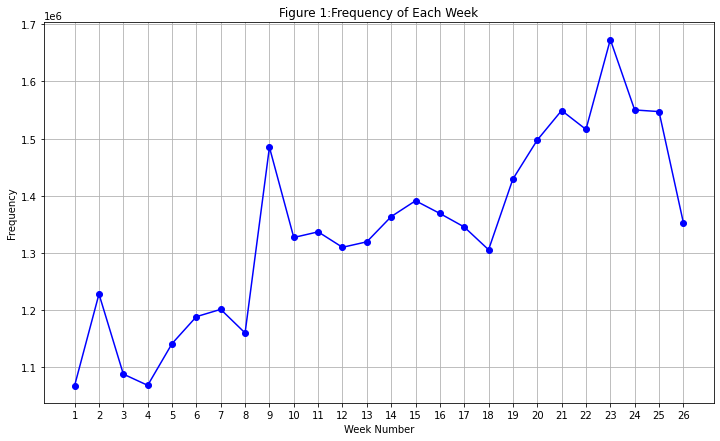

In [20]:
week_counts = df['week'].value_counts().sort_index()
# Creating the line plot
plt.figure(figsize=(12, 7))  
plt.plot(week_counts.index, week_counts.values, marker='o', linestyle='-', color='b') 

# Adding titles and labels
plt.title('Figure 1:Frequency of Each Week')
plt.xlabel('Week Number')
plt.ylabel('Frequency')

# Setting the x-ticks to ensure every week number is shown
plt.xticks(week_counts.index)  # Ensure every week is labeled

# Optionally, you can add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

From the figure 1 we can observe that there is a sudden increase in the alarms from week 8 to week 10 and then no significant decrease. It could be interesting to know why.

<Figure size 1296x720 with 0 Axes>

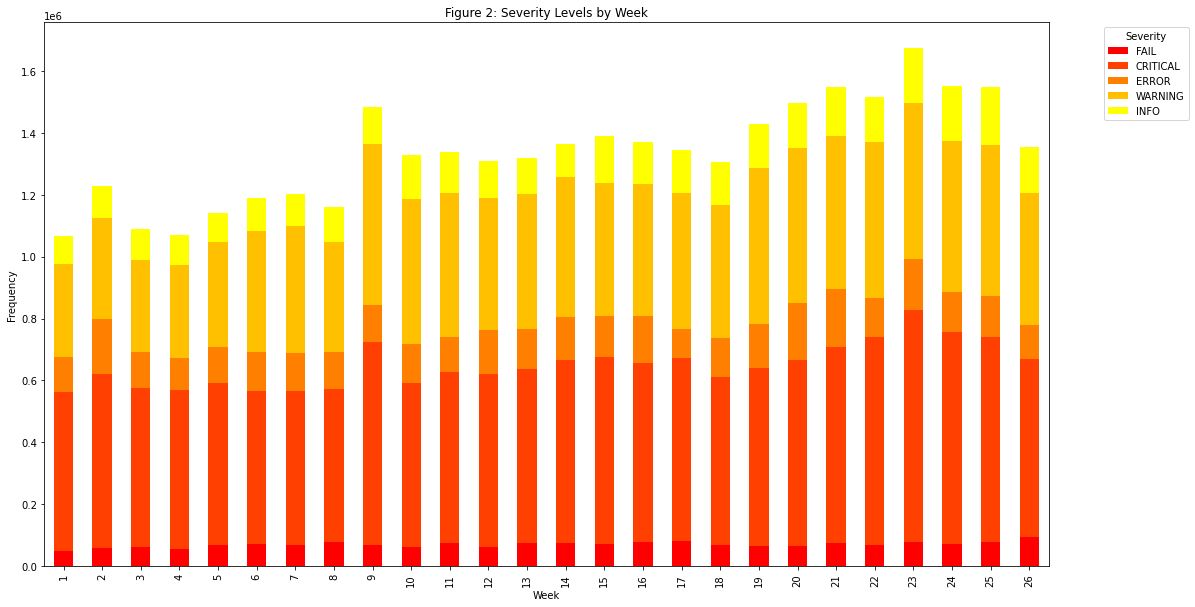

In [23]:
# Define the severity order
severity_order = ['FAIL', 'CRITICAL', 'ERROR', 'WARNING', 'INFO']

# Cross-tabulation of severity and week
ct = pd.crosstab(df['week'], df['Severity'])

# Reorder the columns according to the specified severity order
ct = ct[severity_order]

# Plotting the stacked bar chart
plt.figure(figsize=(18, 10))  # Adjusted figure size
ax = ct.plot(kind='bar', stacked=True, colormap='autumn', figsize=(18, 10))  # Set figure size here as well

# Customize the legend
ax.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

# Set the title and labels
plt.title('Figure 2: Severity Levels by Week')
plt.xlabel('Week')
plt.ylabel('Frequency')

# Show the plot
plt.show()

From the figure 2,the frequency of FAILs appears to be consistently high throughout the weeks, showing a notable volume compared to other categories. CRITICAL events also present substantial numbers but with some variability over time. The ERROR category demonstrates a general decreasing trend, particularly in the later weeks. WARNINGs and INFO, while present, are less frequent. This visualization helps in understanding temporal trends and urgency in addressing different severity levels within an operational context.

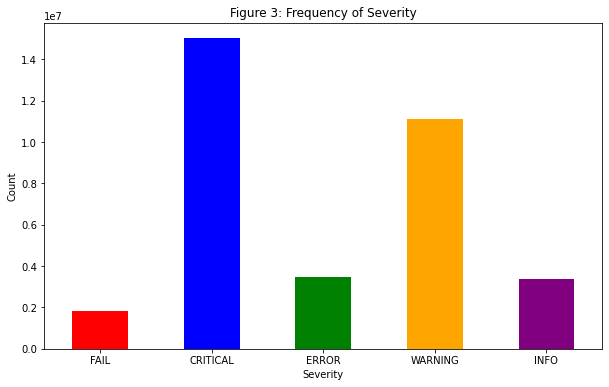

In [24]:
# Count the occurrences of each severity level
severity_counts = df['Severity'].value_counts()

# Reorder the index based on your specific order
order = ['FAIL', 'CRITICAL', 'ERROR', 'WARNING', 'INFO']
severity_counts = severity_counts.reindex(order)

# Define colors for each severity level
colors = ['red', 'blue', 'green', 'orange', 'purple'] 

# Creating the bar plot
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar', color=colors)
plt.title('Figure 3: Frequency of Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the labels horizontal for better readability
plt.show()

We have already seen in descriptive statistics that highest frequently occuring severity is "Critical". The lowest frequent severity is "Fail" which means that most of the issues raised by alarm are being resolved without causing the device to fail.

Feature Engineering

I have derived a new variable named "Resolution_time" from the existing columns named "Activation timestamp" and "Cleared Timestamp". Indicating the time taken to resolve the issues.

In [25]:
from datetime import datetime, timedelta, timezone

def calculate_resolution_time(row):
    """
    Calculate the time taken to resolve an event in minutes.

    Parameters:
    - row (pandas Series): Row containing 'ActivatedTimestamp' and 'ClearedTimestamp'.

    Returns:
    - resolution_time_minutes (float): Time taken to resolve the event in minutes.
    """
    # Strip the 'Z' and parse the datetime
    activated_time = datetime.fromisoformat(row['ActivatedTimestamp'].rstrip('Z'))
    cleared_time = datetime.fromisoformat(row['ClearedTimestamp'].rstrip('Z'))

    # If you need the times to be in UTC explicitly
    activated_time = activated_time.replace(tzinfo=timezone.utc)
    cleared_time = cleared_time.replace(tzinfo=timezone.utc)

    # Calculate the resolution time
    resolution_time = cleared_time - activated_time
    resolution_time_minutes = resolution_time.total_seconds() / 60  # Convert to minutes
    return resolution_time_minutes
# Apply the function to each row of the DataFrame
df['ResolutionTimeMinutes'] = df.apply(calculate_resolution_time, axis=1)

# Display the DataFrame with the resolution time in minutes
df['ResolutionTimeMinutes']


0           82984.950000
1               0.383333
2               8.150000
3               4.883333
4               4.983333
                ...     
34822182       19.466667
34822183       10.733333
34822184       13.833333
34822185       10.700000
34822186      309.033333
Name: ResolutionTimeMinutes, Length: 34813823, dtype: float64

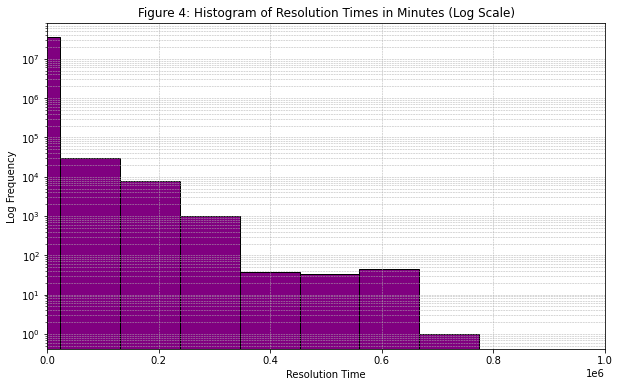

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['ResolutionTimeMinutes'], bins=50, color='purple', edgecolor='black', log=True)
plt.xlabel('Resolution Time')
plt.ylabel('Log Frequency')
plt.title('Figure 4: Histogram of Resolution Times in Minutes (Log Scale)')
plt.xlim(0, 1000000)  # Focusing on the most relevant range
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  # Adding grid lines for better readability
plt.show()

In [27]:
df["ResolutionTimeMinutes"].describe()

count    3.481382e+07
mean     1.444753e+02
std      4.205764e+03
min     -2.992593e+05
25%      1.333333e-01
50%      5.000000e-01
75%      4.750000e+00
max      5.070408e+06
Name: ResolutionTimeMinutes, dtype: float64

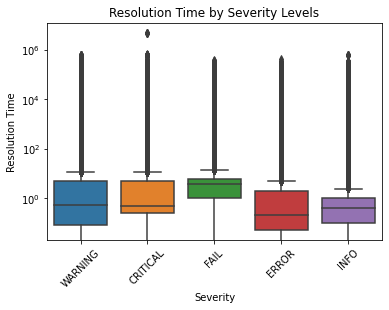

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ResolutionTimeMinutes' is already in minutes
sns.boxplot(x='Severity', y='ResolutionTimeMinutes', data=df)
plt.title('Resolution Time by Severity Levels')
plt.xlabel('Severity')
plt.ylabel('Resolution Time')
plt.yscale('log')  # Use logarithmic scale if data spans several orders of magnitude
plt.xticks(rotation=45)  # Rotate labels if they overlap or for better readability
plt.show()

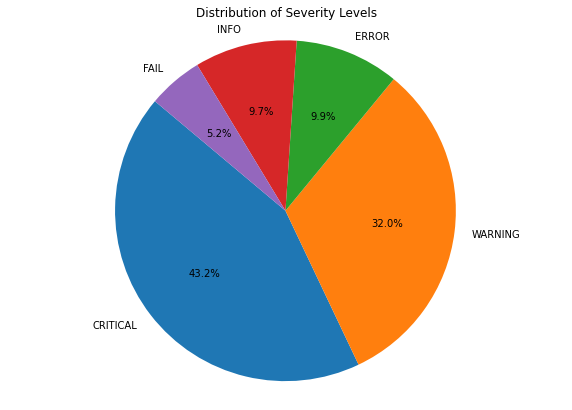

In [29]:
import matplotlib.pyplot as plt

# Count the occurrences of each severity
severity_counts = df['Severity'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Severity Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

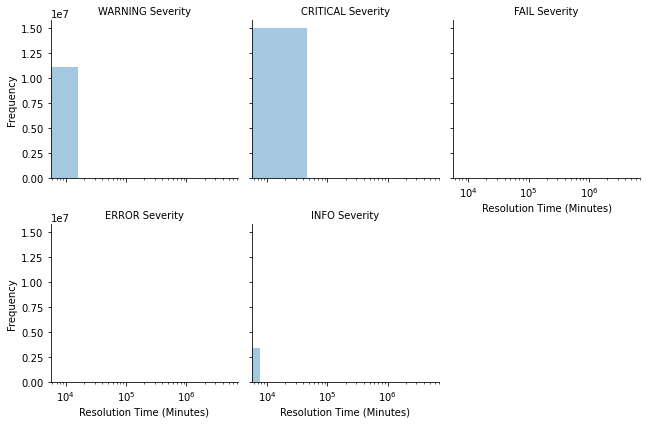

In [30]:
# Create a histogram with a facet grid to separate each severity level
g = sns.FacetGrid(df, col='Severity', col_wrap=3, height=3)
g.map(sns.distplot, 'ResolutionTimeMinutes', bins=30, kde=False, hist=True)

# Additional settings for better readability and layout adjustments
g.set_titles('{col_name} Severity')
g.set_axis_labels('Resolution Time (Minutes)', 'Frequency')
g.set(xscale='log')  # Use logarithmic scale if data spans several orders of magnitude

# Adjusting the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

 The majority of resolution times are concentrated at lower values, with the highest frequency occurring at the shortest durations close to zero. As resolution time increases, the frequency gradually declines, indicating fewer events take longer to resolve. Notably, there is a long tail extending up to 500,000 minutes, showing that while rare, some events take significantly longer to resolve. This suggests a skewed distribution where most resolutions are quick, but a non-negligible number of cases require extended periods, potentially indicating complex issues or bottlenecks in the resolution process.

Exploring the frequency distribution of AssetType 

In [31]:
asset_type_count = df["AssetType"].value_counts()
asset_type_frequency_table = pd.DataFrame(asset_type_count).reset_index()
asset_type_frequency_table.columns = ['Asset Type', 'Frequency']
asset_type_frequency_table

,Asset Type,Frequency
0,UPS,11805752
1,RPDU,8765783
2,POD,4614883
3,CAMERA,2523722
4,EMS,1830929
5,CRAC,867678
6,NETBOTZ_WALL_APPLIANCE,848547
7,NETBOTZ_RACK_APPLIANCE,843905
8,RACK_MANAGER,795420
9,ATS,787119


In [35]:
df_nlp = df.copy()

In [34]:
df_nlp.to_csv('EDA_Dataset.csv', index=False)